In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pickle

## Trento

### Week 1

In [2]:
week = 1
city = 'tn'
max_id = 10000
data = pd.read_csv(f'../data/{city}_to_{city}/{city}_to_{city}_week{week}.csv')
print(data.shape)
data.head()

(22479855, 3)


,square_id1,square_id2,strength
0,38,38,0.189726
1,38,39,0.075876
2,38,40,0.046166
3,38,154,0.135384
4,38,155,0.104347


In [3]:
with open(f'hotspots_{city}.pkl', 'rb') as file:
    hotspots = pickle.load(file)

#### Degree Centrality Uncleaned

In [4]:
degree_centralities = list()
for hp in hotspots:
    degree_centralities.append(data[(data.square_id1 == hp) &  
                                    (~(data.square_id2 == hp))].strength.sum())

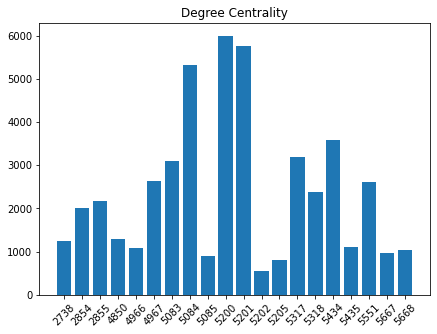

In [5]:
plt.figure(figsize=(7,5))
plt.title('Degree Centrality')
plt.bar(range(len(degree_centralities)), degree_centralities)
plt.xticks(range(len(degree_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/degree_centrality_{city}_week{week}_uncleaned.png')

#### Cleaning Data

In [6]:
data_cleaned = data[(data.square_id1.isin(hotspots)) & 
                    (data.square_id2.isin(hotspots))]
print(data_cleaned.shape)
data_cleaned.head()

(400, 3)


,square_id1,square_id2,strength
2719883,2738,2738,58.188393
2719942,2738,2854,60.391584
2719943,2738,2855,86.029911
2721132,2738,4850,3.031244
2721217,2738,4966,0.866128


#### Degree Centrality Clean

In [7]:
degree_centralities = list()
for hp in hotspots:
    degree_centralities.append(data_cleaned[(data_cleaned.square_id1 == hp) &  
                                            (~(data_cleaned.square_id2 == hp))].strength.sum())

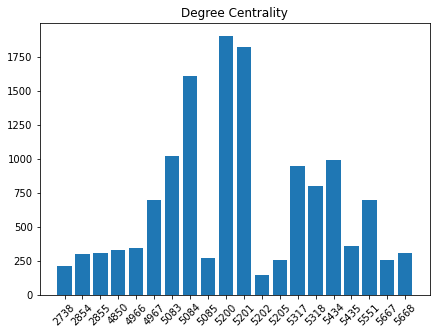

In [8]:
plt.figure(figsize=(7,5))
plt.title('Degree Centrality')
plt.bar(range(len(degree_centralities)), degree_centralities)
plt.xticks(range(len(degree_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/degree_centrality_{city}_week{week}.png')

#### Building Graph

In [9]:
G = nx.DiGraph()

In [10]:
for row in data_cleaned.values:
    G.add_edge(row[0], row[1], strength=row[2])

#### Closeness Centrality

In [11]:
closeness_centralities = list()
for hp in hotspots:
    cc = nx.closeness_centrality(G, hp, distance='strength') / 19
    closeness_centralities.append(cc)

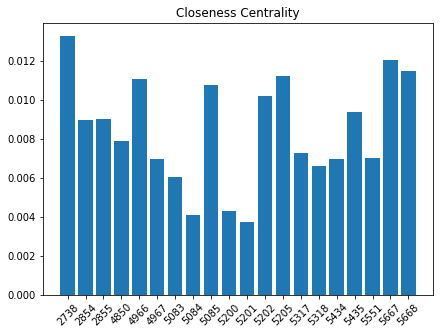

In [12]:
plt.figure(figsize=(7,5))
plt.title('Closeness Centrality')
plt.bar(range(len(closeness_centralities)), closeness_centralities)
plt.xticks(range(len(closeness_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/closeness_centrality_{city}_week{week}.png')

#### Betweenness Centrality

In [13]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=False, weight='strength')

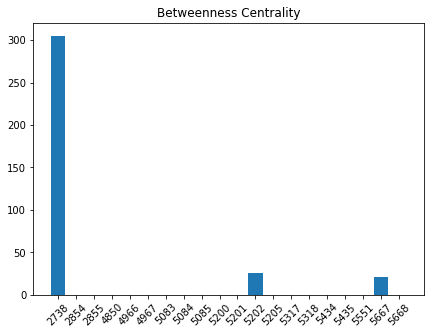

In [14]:
plt.figure(figsize=(7,5))
plt.title('Betweenness Centrality')
plt.bar(range(len(betweenness_centrality)), betweenness_centrality.values())
plt.xticks(range(len(betweenness_centrality)), [int(x) for x in betweenness_centrality.keys()], rotation=45)
plt.savefig(f'../plots/betweenness_centrality_{city}_week{week}.png')

#### PageRank Centrality

In [15]:
pagerank_centrality = nx.pagerank(G, weight='strength')
pagerank_centrality

{2738.0: 0.025474033504961486,
 2854.0: 0.03935382336208973,
 2855.0: 0.03917620492374883,
 4850.0: 0.02445422882596834,
 4966.0: 0.02768352650150696,
 4967.0: 0.05948734249820713,
 5083.0: 0.06958394275532087,
 5084.0: 0.10630310901588032,
 5085.0: 0.021350109788999455,
 5200.0: 0.1289057489928181,
 5201.0: 0.12044941032619398,
 5202.0: 0.017202128455744693,
 5205.0: 0.01976162785462882,
 5317.0: 0.0564923348221821,
 5318.0: 0.04937552699322387,
 5434.0: 0.07080261984995014,
 5435.0: 0.02584972730452849,
 5551.0: 0.04897521013309138,
 5667.0: 0.024639377212002045,
 5668.0: 0.02467996687895329}

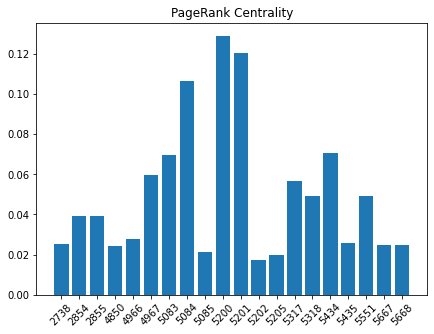

In [16]:
plt.figure(figsize=(7,5))
plt.title('PageRank Centrality')
plt.bar(range(len(pagerank_centrality)), pagerank_centrality.values())
plt.xticks(range(len(pagerank_centrality)), [int(x) for x in pagerank_centrality.keys()], rotation=45)
plt.savefig(f'../plots/pagerank_centrality_{city}_week{week}.png')

#### Eigenvector Centrality

In [17]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='strength')
eigenvector_centrality

{2738.0: 0.014139902633094977,
 2854.0: 0.02991782004420358,
 2855.0: 0.02758027731699112,
 4850.0: 0.041814067685156775,
 4966.0: 0.058063927627223934,
 4967.0: 0.14342534062619539,
 5083.0: 0.23223005318747975,
 5084.0: 0.4121137024042304,
 5085.0: 0.04778717370774186,
 5200.0: 0.625013657946386,
 5201.0: 0.5158607193061926,
 5202.0: 0.0285234946314118,
 5205.0: 0.045294685368416916,
 5317.0: 0.16472325070229055,
 5318.0: 0.1362359656420494,
 5434.0: 0.16528437074446695,
 5435.0: 0.04823259279651748,
 5551.0: 0.09382392588749566,
 5667.0: 0.033918412521585686,
 5668.0: 0.038591471470894506}

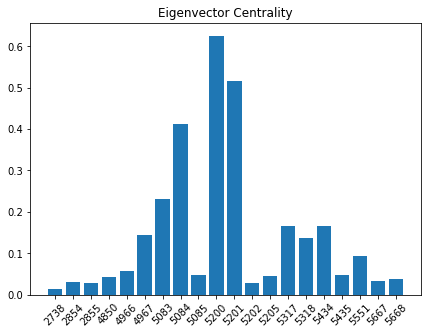

In [18]:
plt.figure(figsize=(7,5))
plt.title('Eigenvector Centrality')
plt.bar(range(len(eigenvector_centrality)), eigenvector_centrality.values())
plt.xticks(range(len(eigenvector_centrality)), [int(x) for x in eigenvector_centrality.keys()], rotation=45)
plt.savefig(f'../plots/eigenvector_centrality_{city}_week{week}.png')